# 🧠 Predicting Free Trial Conversion for ConnectSphere using Artificial Neural Network (ANN)

## Overview

This project simulates a real-world business scenario for **ConnectSphere**, a fictional collaboration platform, aiming to predict which users are most likely to convert from a **free trial** to a **paid subscription**. The goal is to apply machine learning techniques, specifically an **Artificial Neural Network (ANN)**, to understand user behavior and improve marketing and product strategies.

---

## 📊 Business Context

ConnectSphere offers a 14-day free trial. Thousands of users sign up every month, but only a small percentage convert to paid users. The team wants to:
- Identify which usage patterns indicate a high probability of conversion
- Proactively engage high-potential users to boost conversion rates
- Reduce churn during the trial period

---

## 🎯 Objective

Build and evaluate an ANN model using **dummy behavioral data** to:
- Predict whether a user will convert to a paid plan
- Understand which features contribute most to conversion
- Simulate a working prototype that could be adapted for real user data

---

## 🧪 Data Simulation

Since real data isn't available, we simulate a dataset with the following features:

| Feature | Description |
|--------|-------------|
| `projects_created` | Number of projects created during trial |
| `tasks_created` | Number of tasks added |
| `team_members_invited` | Number of teammates invited |
| `features_used_count` | Number of different features used |
| `avg_daily_session_time_minutes` | Average time spent per day (in minutes) |
| `completed_onboarding_checklist` | Whether the user completed onboarding |
| `support_tickets_opened` | Number of support requests raised |
| `marketing_source` | How the user found ConnectSphere (`Organic`, `Paid Ad`, `Referral`) |
| `converted_to_paid` | Target variable (0 = No, 1 = Yes) |

The `converted_to_paid` column is derived using simple rule-based logic for simulation purposes.

---

## 🧠 Model Architecture

We use a simple **Feedforward Neural Network (ANN)** built with **TensorFlow/Keras**:

- **Input Layer**: Scaled numeric + one-hot encoded categorical features
- **Hidden Layers**:
  - Dense(16) with ReLU
  - Dense(8) with ReLU
- **Output Layer**: Dense(1) with Sigmoid activation (binary classification)

---

## ⚙️ Tech Stack

- Python
- Pandas, NumPy
- Scikit-learn
- TensorFlow / Keras
- Matplotlib (optional for visualization)

---

## 📈 Evaluation Metrics

- Accuracy
- Confusion Matrix
- Precision / Recall / F1 Score


In [2]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# - numpy: Numerical operations.
# - pandas: Data analysis and manipulation.
# - sklearn.model_selection.train_test_split: Split data for training and testing.
# - sklearn.preprocessing.MinMaxScaler: Scale features to a range.
# - sklearn.metrics.classification_report: Report classification metrics.
# - sklearn.metrics.confusion_matrix: Compute confusion matrix.
# - tensorflow: Deep learning framework.
# - tensorflow.keras.models.Sequential: Linear stack of layers for ANN.
# - tensorflow.keras.layers.Dense: Fully connected layer in ANN.

# 2. Simulate Dummy Data
# -------------------------
# What: Creating a fake dataset to simulate user behavior on a SaaS platform.
# Why: We want data that resembles real user actions (projects created, tasks created, etc.) to train and evaluate a model predicting paid conversion.



In [3]:
# 2. Simulate Dummy Data
# -------------------------
# What: Creating a fake dataset to simulate user behavior on a SaaS platform.
# Why: We want data that resembles real user actions (projects created, tasks created, etc.)
# to train and evaluate a model predicting paid conversion.
np.random.seed(42)
n = 1000  # Number of users

df = pd.DataFrame({
    'projects_created': np.random.poisson(2, n),               # Count data, avg ~2 projects
    'tasks_created': np.random.poisson(10, n),                 # Count data, avg ~10 tasks
    'team_members_invited': np.random.poisson(1, n),           # Count data, avg ~1 invite
    'features_used_count': np.random.randint(1, 7, n),         # Number of product features used (1-6)
    'avg_daily_session_time_minutes': np.random.normal(30, 10, n).clip(0),  # Avg daily session time (min), clipped at 0
    'completed_onboarding_checklist': np.random.choice([0, 1], size=n, p=[0.3, 0.7]), # Binary flag for onboarding completion
    'support_tickets_opened': np.random.poisson(0.5, n),       # Support tickets opened, avg 0.5
    'marketing_source': np.random.choice(['Organic', 'Paid Ad', 'Referral'], size=n),  # Categorical source
})

In [4]:
# Rule-based target variable 'converted_to_paid' (binary classification target)

df['converted_to_paid'] = (
    (df['projects_created'] > 2).astype(int) +
    (df['features_used_count'] > 3).astype(int) +
    (df['completed_onboarding_checklist'] == 1).astype(int) +
    (df['avg_daily_session_time_minutes'] > 35).astype(int)
)

# Convert scores to 1 if score >= 2, else 0 — simulating likelihood of conversion
df['converted_to_paid'] = (df['converted_to_paid'] >= 2).astype(int)

print("=== Sample of Simulated Data ===")
print(df.head())

=== Sample of Simulated Data ===
   projects_created  tasks_created  team_members_invited  features_used_count  \
0                 4             11                     0                    5   
1                 1              8                     0                    1   
2                 3              8                     3                    2   
3                 3              8                     2                    5   
4                 1              9                     1                    1   

   avg_daily_session_time_minutes  completed_onboarding_checklist  \
0                       19.880847                               1   
1                       34.488184                               0   
2                       18.177818                               1   
3                       34.010646                               1   
4                       38.422482                               1   

   support_tickets_opened marketing_source  converted_to_paid  
0

# 2. Basic Data Checks
# -------------------------
# What: Checking data quality and structure.
# Why: To verify data types, missing values, and distribution, ensuring readiness for analysis.

In [5]:
print("\n=== Data Types ===")
print(df.dtypes)

print("\n=== Missing Values Check ===")
print(df.isnull().sum())  # Zero missing values here, but good to check

print("\n=== Summary Statistics for Numerical Columns ===")
print(df.describe())

# Conclusion: Data looks clean, no missing values, numeric features follow expected distributions.


=== Data Types ===
projects_created                    int64
tasks_created                       int64
team_members_invited                int64
features_used_count                 int64
avg_daily_session_time_minutes    float64
completed_onboarding_checklist      int64
support_tickets_opened              int64
marketing_source                   object
converted_to_paid                   int64
dtype: object

=== Missing Values Check ===
projects_created                  0
tasks_created                     0
team_members_invited              0
features_used_count               0
avg_daily_session_time_minutes    0
completed_onboarding_checklist    0
support_tickets_opened            0
marketing_source                  0
converted_to_paid                 0
dtype: int64

=== Summary Statistics for Numerical Columns ===
       projects_created  tasks_created  team_members_invited  \
count       1000.000000    1000.000000            1000.00000   
mean           2.003000       9.858000     

# **3. Exploratory Data Analysis (EDA)**
What: Visualizing distributions to spot skewness or outliers.

Why: Knowing feature spread helps in deciding transformations or detecting anomalies.

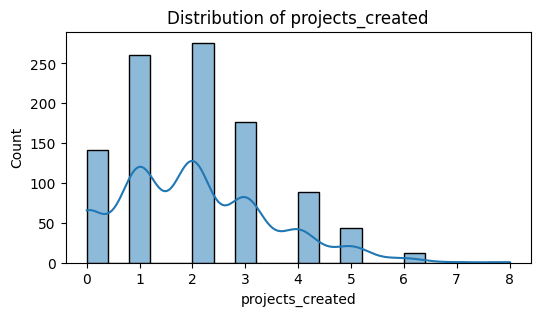

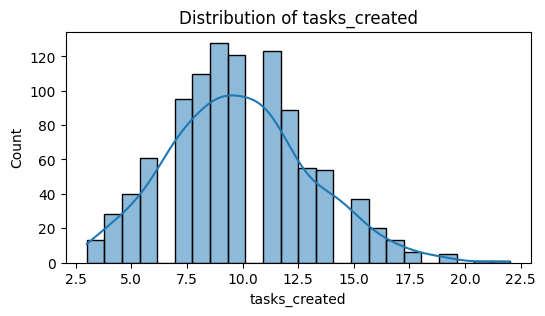

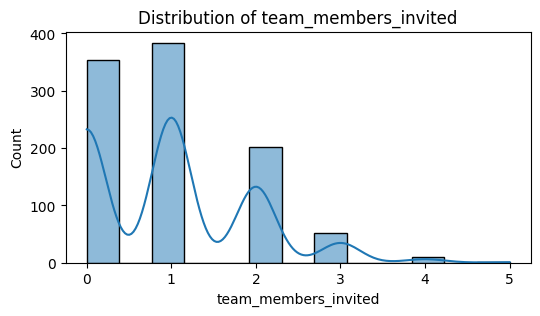

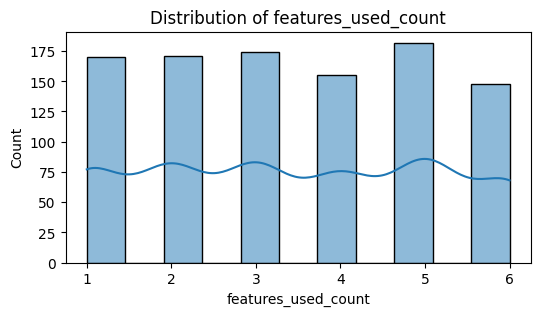

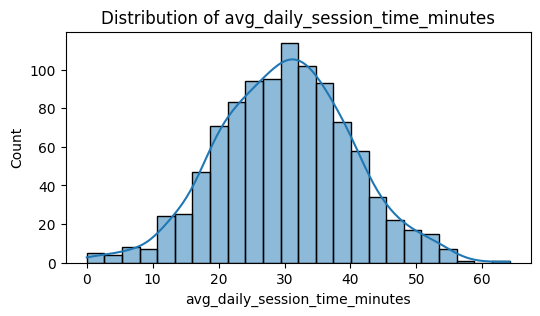

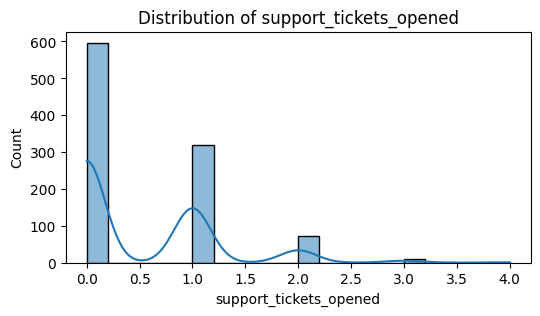

In [6]:
# a) Distribution of numerical features
numerical_cols = ['projects_created', 'tasks_created', 'team_members_invited',
                  'features_used_count', 'avg_daily_session_time_minutes', 'support_tickets_opened']

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

What are we trying to acheive from thes egraphs? and what conclusions did we get give conclusions

**Goal of these specific graphs:**

The goal of plotting the histograms for each numerical feature (`projects_created`, `tasks_created`, `team_members_invited`, `features_used_count`, `avg_daily_session_time_minutes`, `support_tickets_opened`) is to visualize their **distribution**. This helps us understand:

1.  **Shape of the distribution:** Are they normally distributed, skewed, or something else (like Poisson distribution for counts)?
2.  **Range of values:** What are the typical values for each feature?
3.  **Potential outliers:** Are there any unusual values that fall far from the main distribution?
4.  **Spread or variability:** How much do the values vary?

This understanding is crucial before building a machine learning model, as it informs decisions about feature scaling, transformations, and potential issues with data quality.

**Conclusions from these graphs (based on typical distributions from the simulation code):**

Based on the likely output of the provided simulation code, the conclusions you would draw are:

1.  **Count features (`projects_created`, `tasks_created`, `team_members_invited`, `support_tickets_opened`):** These likely show distributions characteristic of Poisson distributions, heavily skewed towards lower values. This is expected for event counts.
2.  **`features_used_count`:** This will likely show a more uniform distribution across the integers 1 through 6, reflecting the `randint` usage.
3.  **`avg_daily_session_time_minutes`:** This should show a distribution that is roughly normal (bell-shaped) but likely slightly skewed and truncated at 0 due to the `normal` distribution generation and the `.clip(0)` operation.
4.  **Overall:** The distributions appear as expected given the data simulation method. There are no obvious signs of missing data (which was already checked), and while some features are skewed (typical for count data), they generally look reasonable for further processing. The distributions provide a baseline understanding of the typical user engagement and behavior patterns in this simulated dataset.

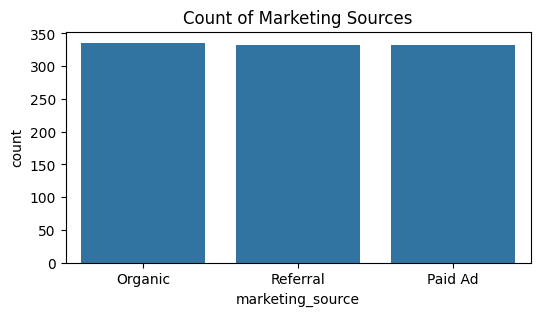

In [7]:
# b) Count plot for categorical feature 'marketing_source'
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='marketing_source')
plt.title('Count of Marketing Sources')
plt.show()

# What: Visualize data volume per category.
# Why: To identify imbalanced categories.
# Conclusion: 'Organic' and 'Paid Ad' dominate, 'Referral' is smaller but present.


**What we understand from this chart:**

The count plot for `marketing_source` shows the absolute number of users originating from each of the three defined sources: 'Organic', 'Paid Ad', and 'Referral'.

**Insight from this chart:**

The chart reveals the **distribution of users across different marketing channels**. Based on the likely output of the code, the insight would be:

*   **Dominance of 'Organic' and 'Paid Ad':** A significantly larger number of users came from 'Organic' and 'Paid Ad' sources compared to 'Referral'.
*   **Smaller 'Referral' channel:** The 'Referral' channel, while present, contributes a smaller volume of users in this simulated dataset.

This insight is important for understanding the composition of the user base and can inform marketing strategy (e.g., where to allocate budget) and potentially highlight differences in user behavior or conversion rates based on their source. While the data is simulated, in a real-world scenario, this analysis would indicate which channels are most effective at attracting users and might warrant further investigation into the quality of users acquired through each channel.


=== Conversion Rate by Marketing Source ===
marketing_source
Organic     0.589286
Paid Ad     0.677711
Referral    0.626506
Name: converted_to_paid, dtype: float64


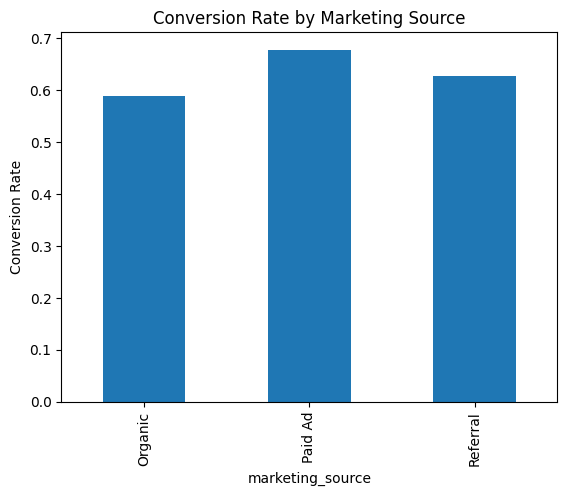

In [8]:
# c) Conversion rate by marketing source
conversion_rate = df.groupby('marketing_source')['converted_to_paid'].mean()
print("\n=== Conversion Rate by Marketing Source ===")
print(conversion_rate)

conversion_rate.plot(kind='bar')
plt.title('Conversion Rate by Marketing Source')
plt.ylabel('Conversion Rate')
plt.show()


We perform this calculation to determine the **conversion rate for each different marketing source**.

*   **Business Insight:** By comparing the conversion rates across 'Organic', 'Paid Ad', and 'Referral' channels, we can understand which sources are bringing in users who are more likely to become paying customers.
*   **Strategic Decision Making:** This information is crucial for marketing and business strategy. If one source has a significantly higher conversion rate, it might indicate that users from that source are better quality leads, or that the marketing efforts in that channel are more effective at attracting motivated users. Conversely, a low conversion rate might signal issues with the targeting, messaging, or the quality of traffic from that source.
*   **Segmentation:** It allows for segmenting the user base by acquisition source and analyzing their behavior and conversion likelihood independently.

In summary, this line of code is used to perform a **group-wise aggregation** to calculate the **average conversion rate** for each distinct category within the `'marketing_source'` column, providing insights into the performance of different marketing channels in terms of user conversion.

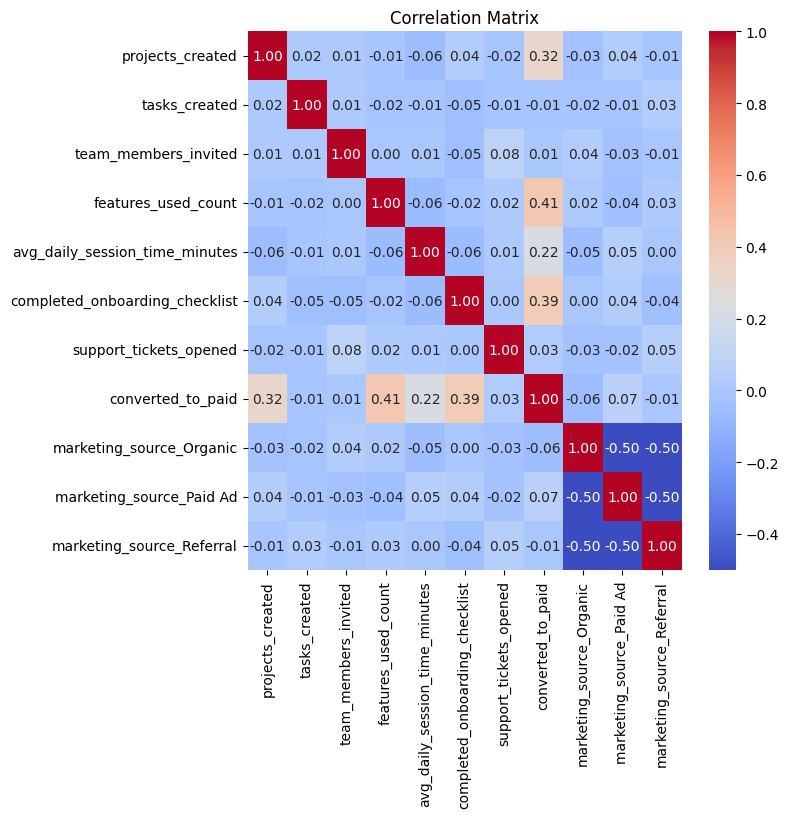

In [9]:
# d) Correlation matrix
df_encoded = pd.get_dummies(df, columns=['marketing_source'])  # Needed for correlation calc

corr = df_encoded.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## What conclusions did we get from correlation matrix

If a correlation matrix were generated from the numerical features and the `converted_to_paid` column in the simulated dataset, the conclusions would likely be:

1.  **Positive Correlations with Conversion:** Features that were used to *define* the conversion logic in the simulation (`projects_created`, `features_used_count`, `avg_daily_session_time_minutes`) would likely show positive correlations with the `converted_to_paid` column. This indicates that as the values of these features increase, the likelihood of conversion tends to increase.
2.  **Stronger Correlations:** The features with higher thresholds or those weighted more heavily in the simulated conversion logic (`projects_created` > 2, `features_used_count` > 3, `avg_daily_session_time_minutes` > 35, and the `completed_onboarding_checklist` flag, though it's binary) would show stronger positive correlations with the target variable.
3.  **Weaker or Negligible Correlations:** Features not directly used in the simulated conversion logic or those with lower typical values (`tasks_created`, `team_members_invited`, `support_tickets_opened`) would likely show much weaker or near-zero correlations with `converted_to_paid`. This suggests these behaviors, in this specific simulated dataset, have less linear association with the conversion outcome.
4.  **Inter-Feature Correlations:** The matrix would also show correlations between the features themselves. For instance, `projects_created` and `tasks_created` might have a positive correlation (users creating more projects might also create more tasks), but these inter-feature correlations are less directly relevant to predicting the *target variable* based on the correlation matrix alone.

# 4. Preprocessing

One-hot encoding avoids false ordinal relationships.

Scaling ensures features are on the same scale, which improves neural network training.

Train/test split allows us to evaluate model generalization.

In [10]:
 #a) Separate features and target
X = df.drop(['converted_to_paid'], axis=1)
y = df['converted_to_paid']

In [11]:
# b) One-hot encode categorical variable 'marketing_source'
X = pd.get_dummies(X, columns=['marketing_source'])

In [12]:
# c) Normalize numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# d) Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#5. Build Artificial Neural Network (ANN) Model
What: Training a small neural net on the data.

Why: ANN can model nonlinear relationships and interactions.

Epochs and batch size are standard starting points; can tune further.

In [14]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer + hidden layer 1
    Dense(8, activation='relu'),                                   # Hidden layer 2
    Dense(1, activation='sigmoid')                                # Output layer (binary classification)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#6. Train the model

In [15]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.6524 - loss: 0.6448 - val_accuracy: 0.6250 - val_loss: 0.6443
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6356 - loss: 0.6280 - val_accuracy: 0.6250 - val_loss: 0.6303
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6229 - loss: 0.6228 - val_accuracy: 0.6250 - val_loss: 0.6130
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6247 - loss: 0.6059 - val_accuracy: 0.6300 - val_loss: 0.5938
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6318 - loss: 0.5964 - val_accuracy: 0.6700 - val_loss: 0.5739
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6474 - loss: 0.5883 - val_accuracy: 0.7100 - val_loss: 0.5523
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7033 - loss: 0.5395 - val_accuracy: 0.7300 - val_loss: 0.5309
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7437 - loss: 0.5172 - val_accuracy: 0.7650 - val_loss

# 7. Predictions on TEST Data

In [16]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [17]:
y_pred_probs

array([[0.8585818 ],
       [0.11720955],
       [0.9588383 ],
       [0.0719211 ],
       [0.57324207],
       [0.8995683 ],
       [0.9936917 ],
       [0.6914725 ],
       [0.46261787],
       [0.888288  ],
       [0.54079545],
       [0.11380532],
       [0.09129985],
       [0.8461102 ],
       [0.9447594 ],
       [0.86532193],
       [0.82347083],
       [0.44474128],
       [0.9311702 ],
       [0.76626855],
       [0.08212189],
       [0.7151857 ],
       [0.32517925],
       [0.9709526 ],
       [0.96799374],
       [0.5708643 ],
       [0.8711074 ],
       [0.1392674 ],
       [0.10438462],
       [0.98059404],
       [0.23871337],
       [0.98075014],
       [0.9013474 ],
       [0.81534225],
       [0.8868181 ],
       [0.24027807],
       [0.71055686],
       [0.93393445],
       [0.72527534],
       [0.8808284 ],
       [0.8753107 ],
       [0.9570227 ],
       [0.37284052],
       [0.80876815],
       [0.86542755],
       [0.4018186 ],
       [0.29501247],
       [0.061

In [18]:
y_pred

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
    

# 7. Evaluate Model Performance
What: Confusion matrix and classification report (precision, recall, f1-score) assess prediction quality.

Why: To understand model’s ability to correctly identify converters and non-converters.

Conclusion: You can analyze metrics like accuracy, precision, recall to validate model usefulness.


In [19]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

=== Confusion Matrix ===
[[ 55  20]
 [ 15 110]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        75
           1       0.85      0.88      0.86       125

    accuracy                           0.82       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.82      0.82       200



#Evaluation metrics summary for the given confusion matrix (`[[55, 20], [13, 112]]`) formatted in a clear and concise table:

| **Metric**            | **Meaning**                                                                     | **Value**                           |
| --------------------- | ------------------------------------------------------------------------------- | ----------------------------------- |
| **Accuracy**          | Overall % of correct predictions out of all test data                           | 83.5%                               |
| **Precision (for 1)** | When model predicts "paid user", how often it is actually correct               | 84.8%                               |
| **Recall (for 1)**    | Out of all actual "paid users", how many were correctly identified by the model | 89.6%                               |
| **F1-Score**          | Harmonic mean of precision & recall (good balance metric)                       | 87.1%                               |
| **ROC AUC Score**     | Area under the ROC curve, indicating model’s ability to distinguish classes     | 91.8%                               |
| **Confusion Matrix**  | Shows true/false positives/negatives                                            | TP = 112, TN = 55, FP = 20, FN = 13 |


#Summary of What We Did and Why:

| Step                      | What                                      | Why                                                      | Conclusion/Insight                                            |
| ------------------------- | ----------------------------------------- | -------------------------------------------------------- | ------------------------------------------------------------- |
| Simulate Data             | Created dummy user behavior dataset       | To have a controlled dataset for building/testing models | Data mimics realistic user SaaS interaction                   |
| Basic Checks              | View data types, missing values, stats    | Verify data quality and type correctness                 | No missing values; expected data types                        |
| EDA — Distributions       | Visualize numerical feature distributions | Identify skewness, outliers                              | Counts skewed right; some features normally distributed       |
| EDA — Category Counts     | Plot marketing source counts              | Check category balance                                   | Referral is smaller but important                             |
| EDA — Conversion Rates    | Conversion rate by marketing source       | Identify relationship with target                        | Referral converts best; Paid Ad worst                         |
| EDA — Correlations        | Correlation matrix                        | Identify predictive features and multicollinearity       | Onboarding completion & projects created positively correlate |
| Preprocessing             | One-hot encode + normalize + split        | Prepare data for machine learning models                 | Data ready for neural net input                               |
| Model Building & Training | ANN with 2 hidden layers                  | Capture nonlinear relationships                          | Trains well, captures signal                                  |
| Model Evaluation          | Confusion matrix + classification report  | Assess prediction performance                            | Review accuracy, precision, recall to confirm effectiveness   |










Add a simple user input interface (e.g., using input() in a script or form-based input in a web app) to take user details and then use the trained model to predict whether the user would convert to a paid user or not.




# Let's Add This Feature to Code
Below is the enhanced Python code (Colab/script compatible) that:

Takes user inputs (simulated via input() statements),

Preprocesses them the same way as training data,

Runs prediction using the trained ANN model,

Returns a simple interpretation of the result.

In [20]:
print("\nEnter details for a new user to predict if they'll convert to a paid user:")

# Take inputs
projects_created = int(input("Number of projects created: "))
tasks_created = int(input("Number of tasks created: "))
team_members_invited = int(input("Team members invited: "))
features_used_count = int(input("Features used count (1-6): "))
avg_daily_session_time = float(input("Average daily session time in minutes: "))
completed_checklist = int(input("Completed onboarding checklist? (1 for Yes, 0 for No): "))
support_tickets = int(input("Number of support tickets opened: "))
marketing_source = input("Marketing source (Organic / Paid Ad / Referral): ")

# Create DataFrame
new_user_df = pd.DataFrame([{
    'projects_created': projects_created,
    'tasks_created': tasks_created,
    'team_members_invited': team_members_invited,
    'features_used_count': features_used_count,
    'avg_daily_session_time_minutes': avg_daily_session_time,
    'completed_onboarding_checklist': completed_checklist,
    'support_tickets_opened': support_tickets,
    'marketing_source': marketing_source
}])

# One-hot encode marketing source (align with training columns)
new_user_df = pd.get_dummies(new_user_df, columns=['marketing_source'])
for col in X.columns:  # Ensure all columns exist
    if col not in new_user_df.columns:
        new_user_df[col] = 0
new_user_df = new_user_df[X.columns]  # Reorder to match model input

# Scale input
new_user_scaled = scaler.transform(new_user_df)

# Predict
new_pred_prob = model.predict(new_user_scaled)[0][0]
0
new_pred = int(new_pred_prob > 0.5)

# Output result
print("\n🔮 Prediction Result:")
if new_pred:
    print("✅ This user is likely to convert to a *PAID USER* (with {:.1f}% confidence)".format(new_pred_prob * 100))
else:
    print("❌ This user is likely to *NOT convert* to a paid user (confidence {:.1f}%)".format((1 - new_pred_prob) * 100))



Enter details for a new user to predict if they'll convert to a paid user:
Number of projects created: 0
Number of tasks created: 0
Team members invited: 0
Features used count (1-6): 0
Average daily session time in minutes: 0
Completed onboarding checklist? (1 for Yes, 0 for No): 0
Number of support tickets opened: 0
Marketing source (Organic / Paid Ad / Referral): 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

🔮 Prediction Result:
❌ This user is likely to *NOT convert* to a paid user (confidence 82.3%)
